# 단순 선형회귀 - 당뇨병 사례

In [10]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

- 당뇨병 데이터셋

In [14]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

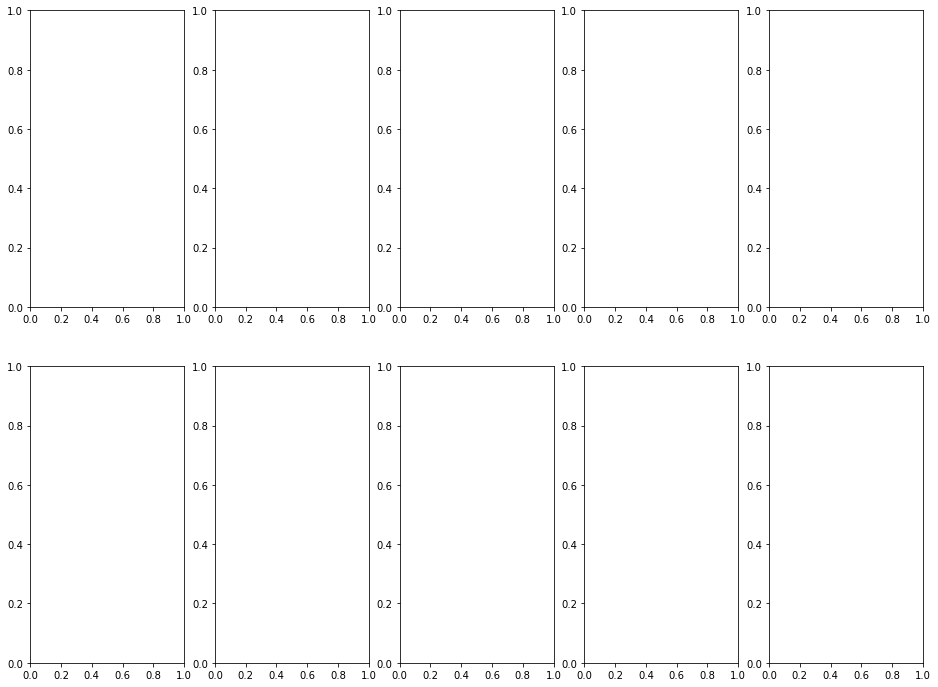

In [22]:
import seaborn as sns
_, axs = plt.subplots(nrows=2, ncols=5, figsize=(16,12))
for i, feature in enumerate(df.columns[:-1]):
    row, col = i/5, i%5
    sns.regplot(x=feature, y='target', data=df, ax=axs[row,col])

- BMI vs target, BP vs target

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [17]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [18]:
# BMI vs target
lr.fit(df.bmi.values.reshape(-1,1), diabetes.target)
lr.score(df.bmi.values.reshape(-1,1), diabetes.target)

0.3439237602253803

In [19]:
# BP vs target
lr.fit(df.bp.values.reshape(-1,1), diabetes.target)
lr.score(df.bp.values.reshape(-1,1), diabetes.target)

0.19490798886682947

### BMI vs target

- 훈련 / 테스트 데이터셋 분리(test_size=0.1)


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.bmi.values.reshape(-1,1), diabetes.target, test_size=0.1, random_state=2021
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
# stratify는 y값의 분포가 

((397, 1), (45, 1), (397,), (45,))

In [23]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [24]:
from sklearn.metrics import r2_score
pred = lr.predict(X_test)
r2_score(y_test, pred) # r2_score == R square value

0.17874580965139086

In [25]:
lr.score(X_test, y_test)

0.17874580965139086